# Lead Score Case Study

X Education wants to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Importing Data

In [3]:
# Importing all datasets
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_data.shape

(9240, 37)

Before importing the dictionary for this data set, let us first use the code 'display.max_colwidth', so that we are able to see the whole description when we upload the dictionary file.

In [5]:
pd.set_option('display.max_colwidth', None)

In [6]:
dict = pd.read_excel("Leads Data Dictionary.xlsx")
dict.head(39)

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Variables,Description
2,NaN,Prospect ID,A unique ID with which the customer is identified.
3,NaN,Lead Number,A lead number assigned to each lead procured.
4,NaN,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
5,NaN,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
6,NaN,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
7,NaN,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
8,NaN,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
9,NaN,TotalVisits,The total number of visits made by the customer on the website.


Note that, the first column `Unnamed:0` is redundant so we can drop it. Also, the second row is actually the header so we make it the header. We can also make the second column as index, so that we can easily get the description of any term during analysis.

In [7]:
dict.drop(columns = ['Unnamed: 0'], inplace = True)

In [8]:
dict.columns = dict.iloc[1]
dict = dict[2:]

In [9]:
dict.set_index('Variables', inplace = True)

In [10]:
dict.head(39)

1,Description
Variables,
Prospect ID,A unique ID with which the customer is identified.
Lead Number,A lead number assigned to each lead procured.
Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
Converted,The target variable. Indicates whether a lead has been successfully converted or not.
TotalVisits,The total number of visits made by the customer on the website.
Total Time Spent on Website,The total time spent by the customer on the website.


### Step 2: Inspecting the Dataframe

In [11]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [12]:
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [13]:
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [14]:
lead_data['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

In [15]:
lead_data['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [16]:
lead_data['Do Not Email'].value_counts()

Do Not Email
No     8506
Yes     734
Name: count, dtype: int64

In [17]:
lead_data['Do Not Call'].value_counts()

Do Not Call
No     9238
Yes       2
Name: count, dtype: int64

In [18]:
lead_data['Converted'].value_counts()

Converted
0    5679
1    3561
Name: count, dtype: int64

In [19]:
lead_data['TotalVisits'].value_counts()

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

In [20]:
lead_data['Total Time Spent on Website'].value_counts()

Total Time Spent on Website
0       2193
60        19
74        18
75        18
127       18
        ... 
1701       1
1952       1
1229       1
1743       1
927        1
Name: count, Length: 1731, dtype: int64

In [21]:
lead_data['Page Views Per Visit'].value_counts()

Page Views Per Visit
0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: count, Length: 114, dtype: int64

In [22]:
lead_data['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [23]:
lead_data['Country'].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [24]:
lead_data['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [25]:
lead_data['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [26]:
lead_data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [27]:
lead_data['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [28]:
lead_data['Search'].value_counts()

Search
No     9226
Yes      14
Name: count, dtype: int64

In [29]:
lead_data['Magazine'].value_counts()

Magazine
No    9240
Name: count, dtype: int64

In [30]:
lead_data['Newspaper Article'].value_counts()

Newspaper Article
No     9238
Yes       2
Name: count, dtype: int64

In [31]:
lead_data['X Education Forums'].value_counts()

X Education Forums
No     9239
Yes       1
Name: count, dtype: int64

In [32]:
lead_data['Newspaper'].value_counts()

Newspaper
No     9239
Yes       1
Name: count, dtype: int64

In [33]:
lead_data['Digital Advertisement'].value_counts()

Digital Advertisement
No     9236
Yes       4
Name: count, dtype: int64

In [34]:
lead_data['Through Recommendations'].value_counts()

Through Recommendations
No     9233
Yes       7
Name: count, dtype: int64

In [35]:
lead_data['Receive More Updates About Our Courses'].value_counts()

Receive More Updates About Our Courses
No    9240
Name: count, dtype: int64

In [36]:
lead_data['Tags'].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [37]:
lead_data['Lead Quality'].value_counts()

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [38]:
lead_data['Update me on Supply Chain Content'].value_counts()

Update me on Supply Chain Content
No    9240
Name: count, dtype: int64

In [39]:
lead_data['Get updates on DM Content'].value_counts()

Get updates on DM Content
No    9240
Name: count, dtype: int64

In [40]:
lead_data['Lead Profile'].value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [41]:
lead_data['City'].value_counts()

City
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [42]:
lead_data['Asymmetrique Activity Index'].value_counts()

Asymmetrique Activity Index
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64

In [43]:
lead_data['Asymmetrique Profile Index'].value_counts()

Asymmetrique Profile Index
02.Medium    2788
01.High      2203
03.Low         31
Name: count, dtype: int64

In [44]:
lead_data['Asymmetrique Activity Score'].value_counts()

Asymmetrique Activity Score
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: count, dtype: int64

In [45]:
lead_data['Asymmetrique Profile Score'].value_counts()

Asymmetrique Profile Score
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: count, dtype: int64

In [46]:
lead_data['I agree to pay the amount through cheque'].value_counts()

I agree to pay the amount through cheque
No    9240
Name: count, dtype: int64

In [47]:
lead_data['A free copy of Mastering The Interview'].value_counts()

A free copy of Mastering The Interview
No     6352
Yes    2888
Name: count, dtype: int64

In [48]:
lead_data['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

### Step 3: Data Preparation

We can observe from the details of some of the categorical variables i.e., `Specialization`, `How did you hear about X Education`, `Lead Profile`, and `City`, they have the category `Select` in them which is irrespective of the category type. This means that, this is equivalent to a null value. So, to get the exact number of null values in the data, let us convert all `Select` entries to 'NaN'.

In [49]:
lead_data[lead_data == 'Select'] = np.NaN

In [50]:
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [51]:
dict.loc['Lead Profile']

1
Description    A lead level assigned to each customer based on their profile.
Name: Lead Profile, dtype: object

In [52]:
lead_data['City'].value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [53]:
dict.head(39)

1,Description
Variables,
Prospect ID,A unique ID with which the customer is identified.
Lead Number,A lead number assigned to each lead procured.
Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
Converted,The target variable. Indicates whether a lead has been successfully converted or not.
TotalVisits,The total number of visits made by the customer on the website.
Total Time Spent on Website,The total time spent by the customer on the website.


#### Droping irrelevent columns

From the description we can understand that for the reasons mentioned below, the following columns have no utility for our analysis:

- `Prospect ID` - no utility
- `Lead Number` - no utility
- `Last Activity` - similar column 'Last notable activity' is already there with no null values, so this is not needed
- `How did you hear about X Education` - More than 60% null values are there.
- `Search` - 99.9% of the customers reponded 'no' on this, so this has no utility
- `Megazine` - 99.9% of the customers reponded 'no' on this, so this has no utility
- `Newspaper Article` - 99.9% of the customers reponded 'no' on this, so this has no utility
- `X Education Forum` - 99.9% of the customers reponded 'no' on this, so this has no utility
- `Newspaper` - 99.9% of the customers reponded 'no' on this, so this has no utility
- `Digital Advertisement` - 99.9% of the customers reponded 'no' on this, so this has no utility
- `Through Recommendation` - 99.9% of the customers reponded 'no' on this, so this has no utility
- `Receive More Updates About Our Courses` - 100% of the customers reponded 'no' on this, so this has no utility
- `Update me on Supply Chain Content` - no utility
- `Get updates on DM Content` - no utility
- `Lead Profile` - we have to create based on our own parameters, this is of no relevance here. Also, more than 60% null values are there.
- `Asymmetrique Activity Score` - no utility
- `Asymmetrique Profile Score` - no utility
- `I agree to pay the amount through cheque` - no utility.

In [54]:
lead_data.drop(columns = ['Prospect ID', 'Lead Number', 'Last Activity', 'How did you hear about X Education', 
                          'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
                          'Newspaper', 'Digital Advertisement', 'Through Recommendations', 
                          'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'Lead Profile', 'Asymmetrique Activity Score', 
                          'Asymmetrique Profile Score', 'I agree to pay the amount through cheque'], 
               axis= 1, inplace= True)

In [55]:
lead_data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Tags                                             3353
Lead Quality                                     4767
City                                             3669
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
A free copy of Mastering The Interview              0
Last Notable Activity       

In [56]:
lead_data.shape

(9240, 19)

#### Handling null values

In [57]:
(lead_data['Lead Source'].isnull().sum()/len(lead_data))*100

0.38961038961038963

In [58]:
(lead_data['TotalVisits'].isnull().sum()/len(lead_data))*100

1.4826839826839828

In [59]:
(lead_data['Page Views Per Visit'].isnull().sum()/len(lead_data))*100

1.4826839826839828

Since the null values for the columns `Lead Source`, `TotalVisits`, and `Page Views Per Visit` are in miniscule amount compared to the data size, we can comfortably remove them.

In [60]:
lead_data = lead_data[~lead_data['Lead Source'].isnull()]

In [61]:
lead_data = lead_data[~lead_data['TotalVisits'].isnull()]

In [62]:
lead_data = lead_data[~lead_data['Page Views Per Visit'].isnull()]

In [63]:
lead_data.isnull().sum()

Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Country                                          2296
Specialization                                   3282
What is your current occupation                  2683
What matters most to you in choosing a course    2702
Tags                                             3327
Lead Quality                                     4720
City                                             3575
Asymmetrique Activity Index                      4153
Asymmetrique Profile Index                       4153
A free copy of Mastering The Interview              0
Last Notable Activity       

Note that, for the remaining columns having null values though the number of null values are large but these variables seems to be important for our analysis. Also, we can not fill these values with mean, median or mode etc., as it may lead to biased results. So, we will keep these variables as such without disturbing their null values.

In [64]:
lead_data.shape

(9074, 19)

#### Standardising Data

Note that, some of the categorical variables including `Country`, `What is your current occupation`, `What matters most to you in choosing a course`, `Tags`, `City`, `Last Notable Activity`, and `Lead Origin` have large number of subcategories and many of these are less than 1%. Let us put these subcategories under 'Others' subcategory to make analysis easier.    

In [65]:
lead_data['Country'].value_counts()

Country
India                   6491
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

In [66]:
lead_data.replace(['United States', 'United Arab Emirates', 'Singapore', 'Saudi Arabia', 'United Kingdom', 'Australia', 'Qatar', 
              'Hong Kong', 'Bahrain', 'Oman', 'France', 'unknown', 'South Africa', 'Nigeria', 'Germany', 'Kuwait', 'Canada', 
              'Sweden', 'China', 'Asia/Pacific Region', 'Uganda', 'Bangladesh', 'Italy', 'Belgium', 'Netherlands', 'Ghana', 
              'Philippines', 'Russia', 'Switzerland', 'Vietnam', 'Denmark', 'Tanzania', 'Liberia', 'Malaysia', 'Kenya', 
              'Sri Lanka', 'Indonesia'], 'Other countries', inplace = True)

In [67]:
lead_data['Country'].value_counts()

Country
India              6491
Other countries     287
Name: count, dtype: int64

In [68]:
lead_data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5476
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: count, dtype: int64

In [69]:
lead_data.replace(['Other', 'Housewife', 'Businessman'], 'Others', inplace = True)

In [70]:
lead_data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5476
Working Professional     677
Student                  206
Others                    32
Name: count, dtype: int64

In [71]:
lead_data['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6370
Flexibility & Convenience       1
Others                          1
Name: count, dtype: int64

In [72]:
lead_data.replace('Flexibility & Convenience', 'Others', inplace = True)

In [73]:
lead_data['Tags'].value_counts()

Tags
Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to O

In [74]:
lead_data.replace(['Closed by Horizzon', 'switched off', 'Busy', 'Lost to EINS', 'Not doing further education', 'Interested  in full time MBA', 
                   'Graduation in progress', 'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup', 
                   'number not provided', 'in touch with EINS', 'Lost to Others', 'Still Thinking', 'Want to take admission but has financial problems', 
                   'In confusion whether part time or DLP', 'Interested in Next batch', 'Lateral student', 'Shall take in the next coming month', 
                   'University not recognized', 'Recognition issue (DEC approval)'], 'Others', 
                  inplace = True)

In [75]:
lead_data['Tags'].value_counts()

Tags
Will revert after reading the email    2016
Others                                 1570
Ringing                                1187
Interested in other courses             509
Already a student                       465
Name: count, dtype: int64

In [76]:
lead_data['City'].value_counts()

City
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: count, dtype: int64

In [77]:
lead_data.replace(['Other Cities', 'Other Cities of Maharashtra', 'Other Metro Cities', 'Tier II Cities'], 
                  'Other Cities', inplace = True)

In [78]:
lead_data['City'].value_counts()

City
Mumbai               3177
Other Cities         1577
Thane & Outskirts     745
Name: count, dtype: int64

In [79]:
lead_data['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [80]:
lead_data.replace(['Olark Chat Conversation', 'Email Link Clicked', 'Email Bounced', 'Unsubscribed', 'Unreachable', 
                   'Had a Phone Conversation', 'Email Marked Spam', 'Approached upfront', 'Resubscribed to emails', 
                   'View in browser link Clicked', 'Form Submitted on Website', 'Email Received'], 
                  'Other_activities', inplace = True)

In [81]:
lead_data['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                   3267
Email Opened               2823
SMS Sent                   2152
Other_activities            514
Page Visited on Website     318
Name: count, dtype: int64

In [82]:
lead_data['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64

In [83]:
lead_data.replace(['Lead Add For', 'Lead Import'], 'Others', inplace = True)

In [84]:
lead_data.Converted = lead_data.Converted.map({0:'No', 1:'Yes'})

In [85]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   object 
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Country                                        6778 non-null   object 
 9   Specialization                                 5792 non-n

In [86]:
lead_data['TotalVisits'] = lead_data['TotalVisits'].astype(int)

##### Analysing Numerical Data

In [87]:
lead_data_num = lead_data.select_dtypes(include=['int32', 'int64', 'float64']).columns
lead_data_num

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [88]:
lead_data_n = lead_data.select_dtypes(include=['int32', 'int64', 'float64'])
lead_data_n.corr()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
TotalVisits,1.000000,0.219723,0.511068
Total Time Spent on Website,0.219723,1.000000,0.318350
Page Views Per Visit,0.511068,0.318350,1.000000


Note that, none of the numerical variable show very high correlation.

#### Creating Dummy Variables

We will create the dummy variable and drop the first column in the dummies created in a single step. 

In [89]:
lead_data_categ = lead_data.select_dtypes('object')

In [90]:
lead_data_c = lead_data.select_dtypes(include=['object']).columns
lead_data_c

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [91]:
lead_data_dummies = pd.get_dummies(lead_data_categ, 
                            columns=['Lead Origin', 'Lead Source', 'Do Not Email',
                                     'Do Not Call', 'Converted', 'Country', 'Specialization',
                                     'What is your current occupation', 'What matters most to you in choosing a course', 
                                     'Tags', 'Lead Quality', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                                     'A free copy of Mastering The Interview', 'Last Notable Activity'],
                            drop_first=True, 
                            dtype="int")
lead_data_dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Thane & Outskirts,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Other_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [92]:
lead_data = pd.concat([lead_data, lead_data_dummies], axis = 1)

# Now let's see the head of our dataframe.
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,...,City_Thane & Outskirts,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Other_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,No,No,No,0,0,0.0,NaN,NaN,...,0,1,0,1,0,0,1,0,0,0
1,API,Organic Search,No,No,No,5,674,2.5,India,NaN,...,0,1,0,1,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,Yes,2,1532,2.0,India,Business Administration,...,0,1,0,0,0,1,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,No,1,305,1.0,India,Media and Advertising,...,0,1,0,0,0,0,1,0,0,0
4,Landing Page Submission,Google,No,No,Yes,2,1428,1.0,India,NaN,...,0,1,0,0,0,0,1,0,0,0


In [93]:
# Droping the categorical variables as we have created the dummies for them
lead_data.drop(['Lead Origin', 'Lead Source', 'Do Not Email',
                                     'Do Not Call', 'Converted', 'Country', 'Specialization',
                                     'What is your current occupation', 'What matters most to you in choosing a course', 
                                     'Tags', 'Lead Quality', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                                     'A free copy of Mastering The Interview', 'Last Notable Activity'], 
               axis = 1, inplace = True)

lead_data.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,City_Thane & Outskirts,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Other_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
1,5,674,2.5,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,2,1532,2.0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,305,1.0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,2,1428,1.0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [94]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 70 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           9074 non-null   int32  
 1   Total Time Spent on Website                           9074 non-null   int64  
 2   Page Views Per Visit                                  9074 non-null   float64
 3   Lead Origin_Landing Page Submission                   9074 non-null   int32  
 4   Lead Origin_Lead Add Form                             9074 non-null   int32  
 5   Lead Origin_Others                                    9074 non-null   int32  
 6   Lead Source_Direct Traffic                            9074 non-null   int32  
 7   Lead Source_Facebook                                  9074 non-null   int32  
 8   Lead Source_Google                                    9074 non-

#### Checking for outliers

In [95]:
lead_data_n.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


We can see a huge jump between 99th percentile and maximum value specifically for `TotalVisits` and `Page Views Per Visit` columns. Let us also draw the boxplots to get a clearer picture.

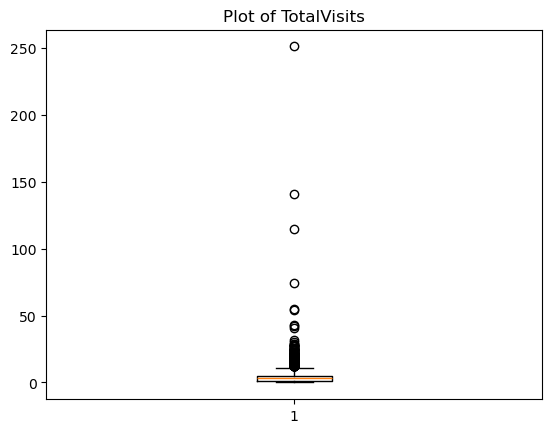

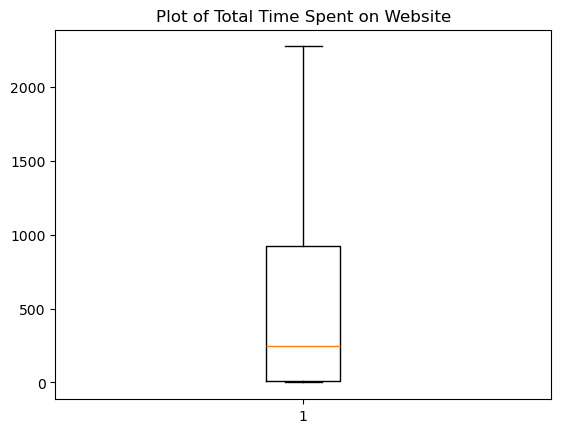

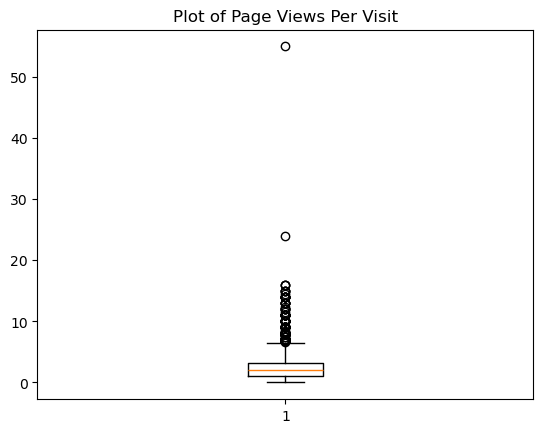

In [96]:
for column in lead_data_n:
    title = "Plot of "+column
    plt.boxplot(lead_data[column])
    plt.title(title)
    plt.show()

Let us remove the outliers for `TotalVisits` and `Page Views Per Visit` columns.

In [97]:
lead_data = lead_data[~(lead_data.TotalVisits > 70)]

In [98]:
lead_data = lead_data[~(lead_data.TotalVisits > 20)]

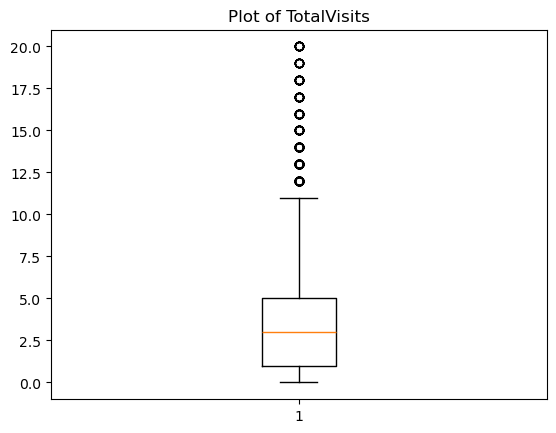

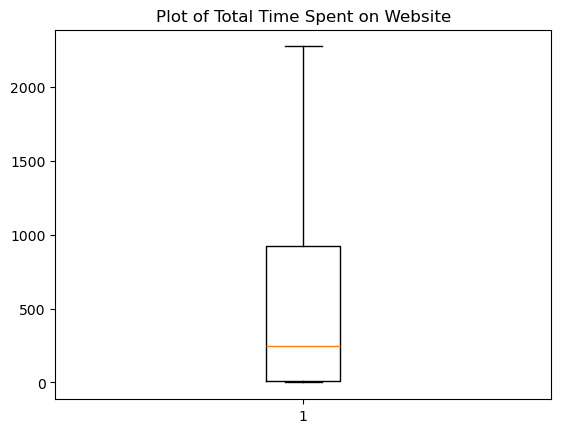

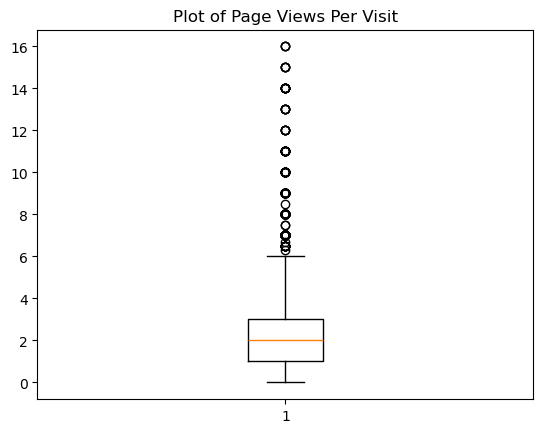

In [99]:
for column in lead_data_n:
    title = "Plot of "+column
    plt.boxplot(lead_data[column])
    plt.title(title)
    plt.show()

Now, the boxplots for `TotalVisits` and `Page Views Per Visit` columns look more interpetable and we can expedct unbiased results during analysis.

In [100]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9027 entries, 0 to 9239
Data columns (total 70 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           9027 non-null   int32  
 1   Total Time Spent on Website                           9027 non-null   int64  
 2   Page Views Per Visit                                  9027 non-null   float64
 3   Lead Origin_Landing Page Submission                   9027 non-null   int32  
 4   Lead Origin_Lead Add Form                             9027 non-null   int32  
 5   Lead Origin_Others                                    9027 non-null   int32  
 6   Lead Source_Direct Traffic                            9027 non-null   int32  
 7   Lead Source_Facebook                                  9027 non-null   int32  
 8   Lead Source_Google                                    9027 non-

### Step 4: Test-Train Split

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
# Putting feature variable to X
X = lead_data.drop(['Converted_Yes'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,City_Thane & Outskirts,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Other_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
1,5,674,2.5,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,2,1532,2.0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,305,1.0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,2,1428,1.0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [103]:
# Putting response variable to y
y = lead_data['Converted_Yes']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted_Yes, dtype: int32

In [104]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website',
         'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                  'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,City_Thane & Outskirts,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Other_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1815,0.530674,-0.747990,1.271393,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,0,0,0
1141,-1.038547,-0.885715,-1.136469,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
259,-0.097015,-0.775535,-0.414110,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1509,-0.097015,0.553969,0.308248,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2019,-1.038547,-0.885715,-1.136469,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [107]:
### Checking the Conversion_Rate
Conversion_Rate = (sum(lead_data['Converted_Yes'])/len(lead_data['Converted_Yes'].index))*100
Conversion_Rate

37.830951589675415

We have almost 38% Conversion_Rate

### Step 6: Looking at Correlations

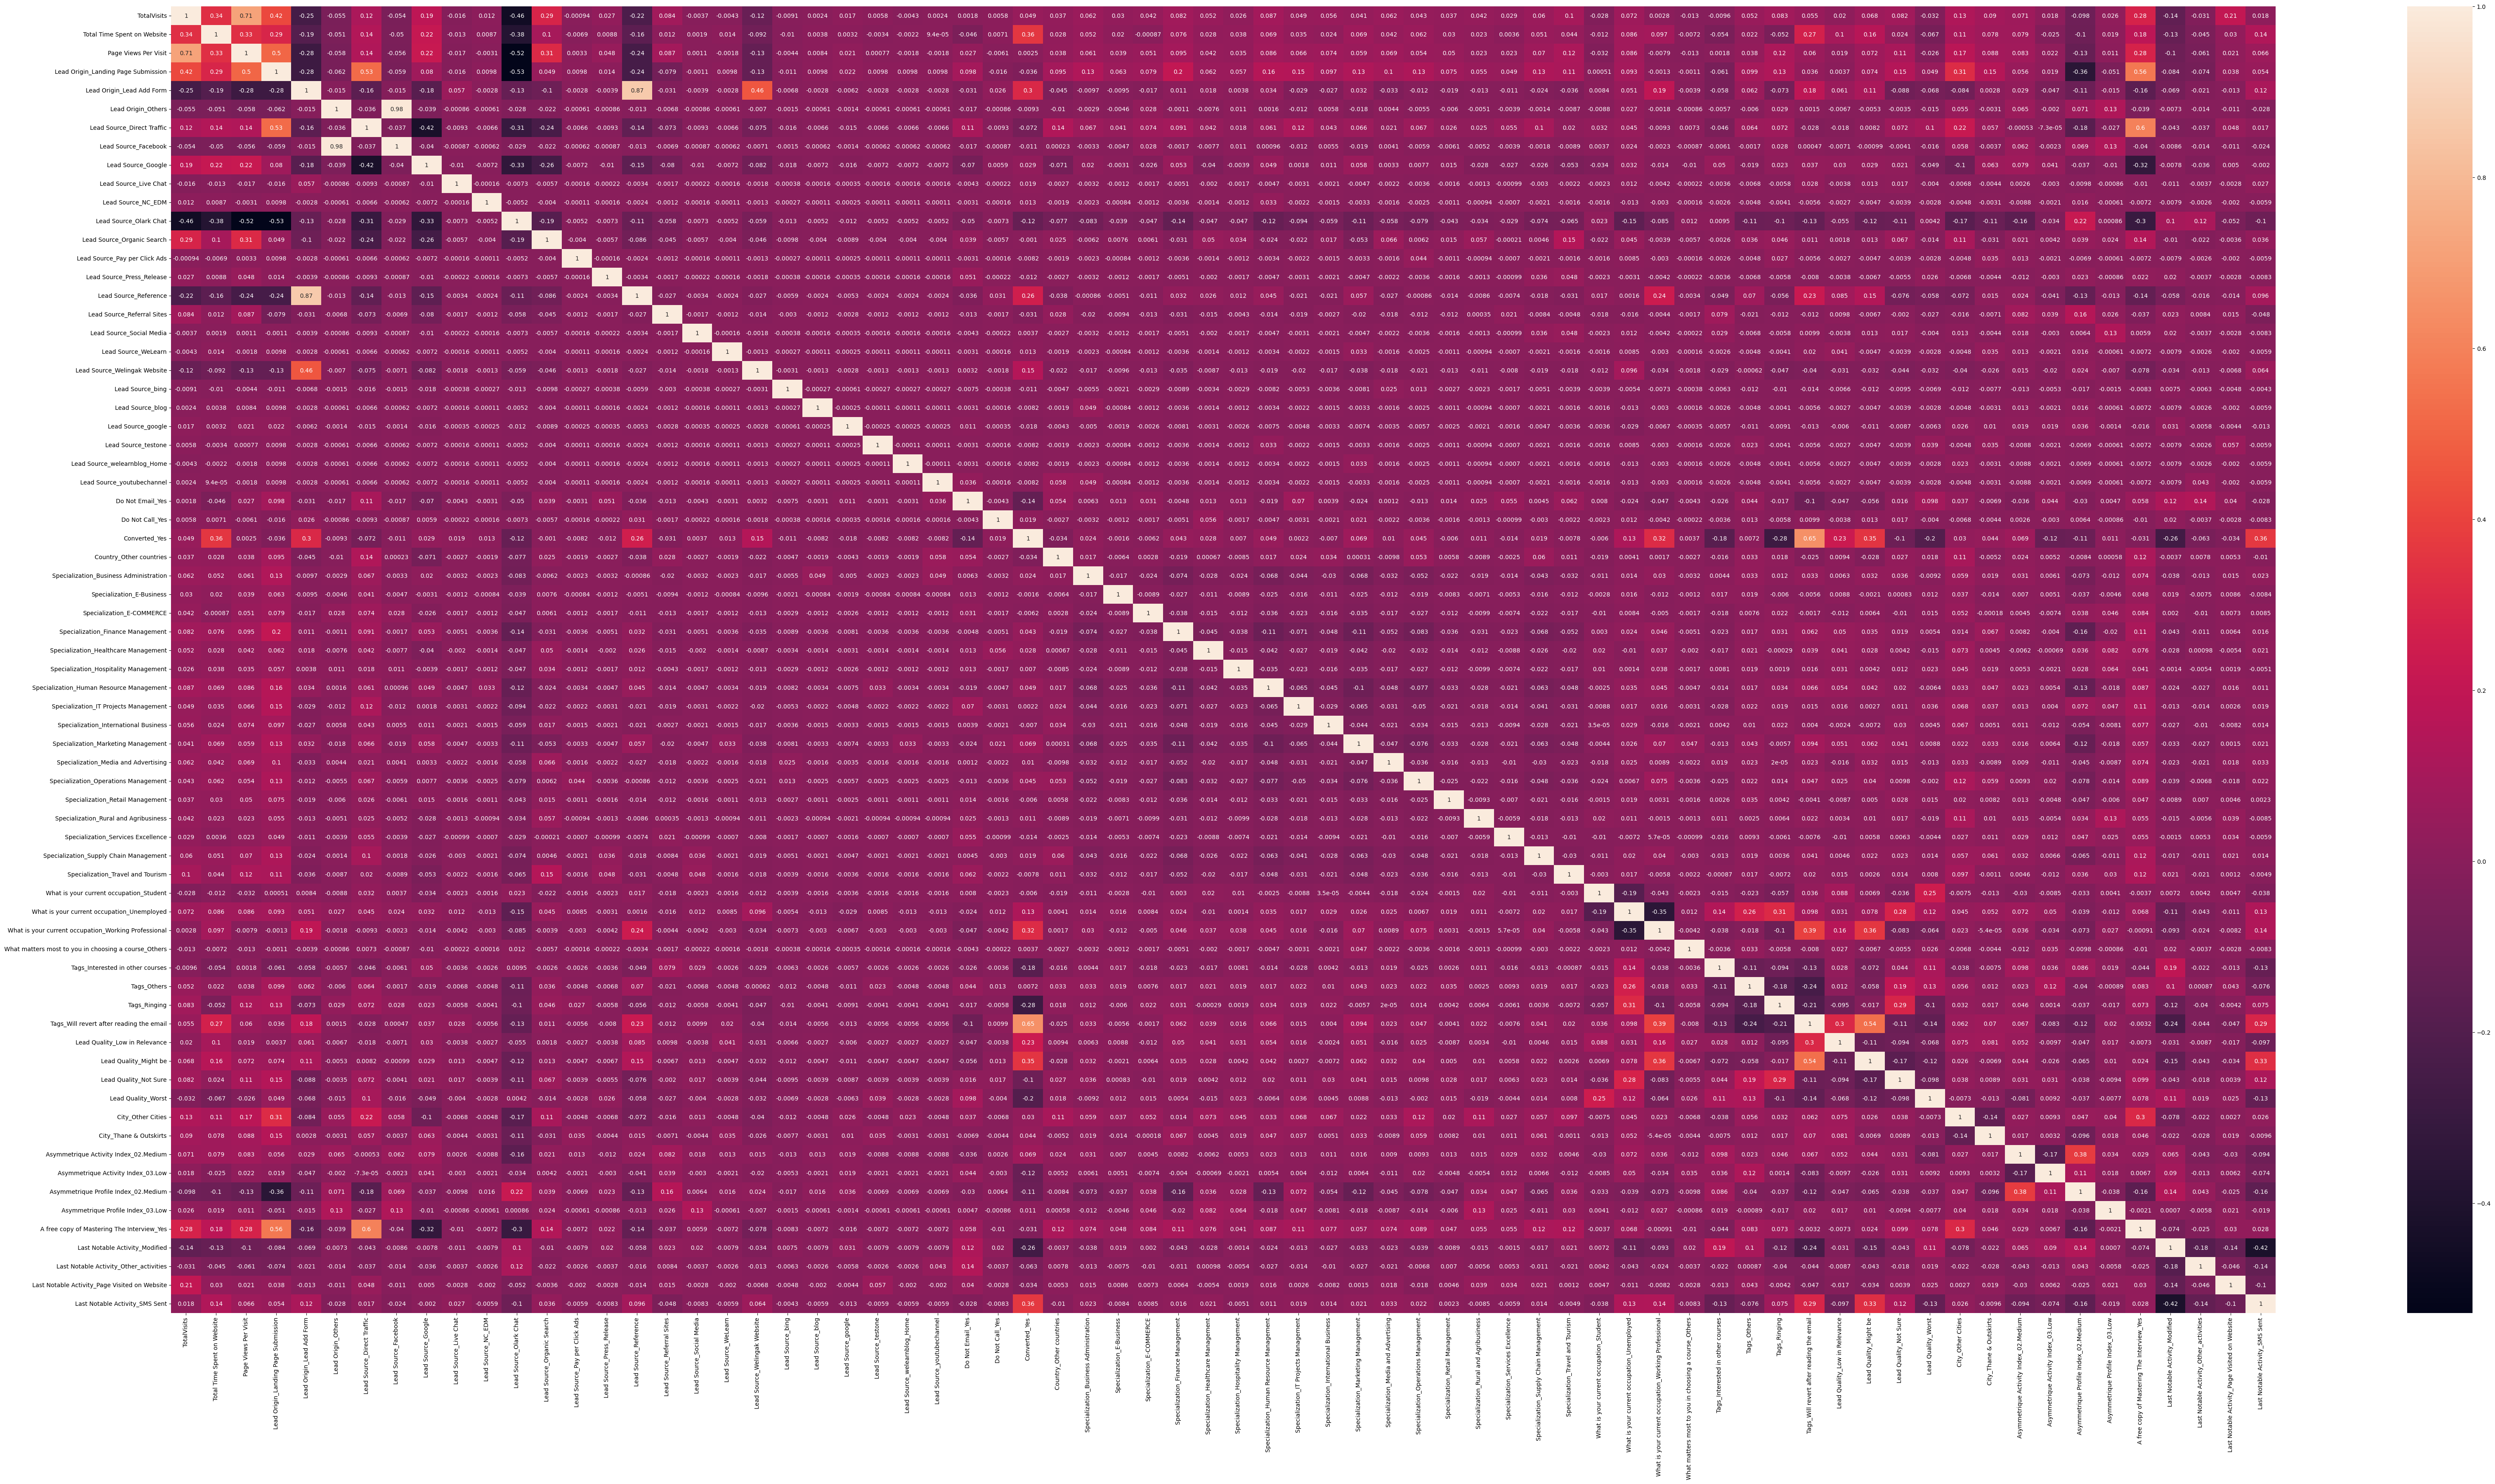

In [108]:
# Let's see the correlation matrix 
plt.figure(figsize = (80,40))        # Size of the figure
sns.heatmap(lead_data.corr(),annot = True)
plt.show()

Though the above heat map is not readable due to large number of variables, but we some whitish and blackish spots in the heat map, which shows strong correlation between some of the variables. So we need to feature selection to avoid multicollinearity while creating the moddel.

In [109]:
lead_data.corr()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,City_Thane & Outskirts,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Other_activities,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
TotalVisits,1.000000,0.336674,0.713405,0.415886,-0.251964,-0.055345,0.119157,-0.054015,0.186142,-0.015531,...,0.089642,0.070629,0.018348,-0.097746,0.026089,0.281367,-0.144778,-0.030807,0.205661,0.017832
Total Time Spent on Website,0.336674,1.000000,0.334378,0.294003,-0.188782,-0.050808,0.141934,-0.050312,0.216228,-0.013167,...,0.078356,0.079052,-0.024883,-0.103302,0.018515,0.178521,-0.127301,-0.045421,0.029969,0.138029
Page Views Per Visit,0.713405,0.334378,1.000000,0.504638,-0.280361,-0.058338,0.136943,-0.055878,0.220777,-0.016964,...,0.087839,0.083250,0.022138,-0.125412,0.011301,0.283081,-0.104693,-0.060636,0.020997,0.065871
Lead Origin_Landing Page Submission,0.415886,0.294003,0.504638,1.000000,-0.282296,-0.062209,0.525324,-0.059443,0.079923,-0.016037,...,0.153969,0.055740,0.019370,-0.360182,-0.050628,0.564174,-0.084454,-0.073988,0.037512,0.054115
Lead Origin_Lead Add Form,-0.251964,-0.188782,-0.280361,-0.282296,1.000000,-0.015131,-0.163384,-0.015382,-0.177338,0.056811,...,0.002824,0.028996,-0.046565,-0.107408,-0.015131,-0.162033,-0.068928,-0.021284,-0.013437,0.115718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A free copy of Mastering The Interview_Yes,0.281367,0.178521,0.283081,0.564174,-0.162033,-0.039344,0.599089,-0.039997,-0.323392,-0.010143,...,0.045805,0.028856,0.006738,-0.162961,-0.002116,1.000000,-0.073679,-0.025040,0.029926,0.027564
Last Notable Activity_Modified,-0.144778,-0.127301,-0.104693,-0.084454,-0.068928,-0.007312,-0.042520,-0.008616,-0.007848,-0.011184,...,-0.022383,0.064956,0.090356,0.144420,0.000705,-0.073679,1.000000,-0.184231,-0.139539,-0.419704
Last Notable Activity_Other_activities,-0.030807,-0.045421,-0.060636,-0.073988,-0.021284,-0.014160,-0.036619,-0.014395,-0.036087,-0.003650,...,-0.027556,-0.043127,-0.013384,0.043171,-0.005838,-0.025040,-0.184231,1.000000,-0.045543,-0.136982
Last Notable Activity_Page Visited on Website,0.205661,0.029969,0.020997,0.037512,-0.013437,-0.010725,0.047743,-0.010903,0.004955,-0.002765,...,0.019072,-0.030381,0.006181,-0.025397,0.021439,0.029926,-0.139539,-0.045543,1.000000,-0.103752


### Step 7: Model Building

#### Feature Selection Using RFE

In [110]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

Since we have around 70 variables let us start by selecting 25 variables under RFE.

In [111]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator = logreg, n_features_to_select = 25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)

In [112]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True, False, False, False,  True, False,
       False, False, False, False, False,  True])

In [113]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('Lead Origin_Landing Page Submission', False, 34),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Others', False, 22),
 ('Lead Source_Direct Traffic', False, 8),
 ('Lead Source_Facebook', False, 20),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Live Chat', False, 42),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 10),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 44),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 7),
 ('Lead Source_Social Media', False, 35),
 ('Lead Source_WeLearn', False, 41),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 14),
 ('Lead Source_blog', False, 19),
 ('Lead Source_google', False, 9),
 ('Lead Source_testone', False, 37),
 ('Lead Source_welearnblog_Home', False, 45),
 ('Lead S

In [114]:
col = X_train.columns[rfe.support_]

In [115]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Country_Other countries', 'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Media and Advertising',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Others',
       'Tags_Interested in other courses', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Lead Quality_Might be',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [116]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Others',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Do Not Call_Yes', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management',


#### Assessing the model with StatsModels

In [117]:
import statsmodels.api as sm

In [118]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Converted_Yes   No. Observations:                 6318
Model:                            GLM   Df Residuals:                     6292
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1557.7
Date:                Sun, 15 Sep 2024   Deviance:                       3115.4
Time:                        20:02:18   Pearson chi2:                 9.65e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.5653
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2980      0.095    -24.225      0.000      -2.484      -2.112
Total Time Spent on Website                              1.0531      0.054     19.610      0.000       0.948       1.158
Lead Origin_Lead Add Form                               18.7563   1.44e+04      0.001      0.999   -2.82e+04    2.82e+04
Lead Source_NC_EDM                                      22.9964   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
Lead Source_Olark Chat                                   0.9134      0.130      7.010      0.000       0.658       1.169
Lead Source_Reference                                  -15.1972   1.44e+04     -0.001      0.999   -2.82e+04    2.82e+04
Lead Source_Welingak Website                           -13.7952   1.44e+04     -0.001      0.999   -2.82e+04    2.82e+04
Do Not Email_Yes                                        -1.2962      0.224     -5.794      0.000      -1.735      -0.858
Country_Other countries                                 -0.4936      0.270     -1.828      0.068      -1.023       0.036
Specialization_Hospitality Management                   -0.8745      0.448     -1.953      0.051      -1.752       0.003
Specialization_International Business                   -0.5734      0.343     -1.672      0.094      -1.245       0.099
Specialization_Media and Advertising                    -0.4930      0.323     -1.528      0.127      -1.126       0.139
Specialization_Services Excellence                      -0.8641      0.819     -1.055      0.291      -2.469       0.741
Specialization_Travel and Tourism                       -0.5361      0.339     -1.583      0.113      -1.200       0.128
What is your current occupation_Student                  1.1650      0.417      2.797      0.005       0.349       1.981
What is your current occupation_Unemployed               1.6330      0.110     14.827      0.000       1.417       1.849
What is your current occupation_Working Professional     3.1192      0.309     10.097      0.000       2.514       3.725
What matters most to you in choosing a course_Others     3.3340      2.858      1.167      0.243      -2.268       8.936
Tags_Interested in other courses                        -3.2565      0.393     -8.294      0.000      -4.026      -2.487
Tags_Ringing                                            -3.9819      0.250    -15.929      0.000      -4.472      -3.492
Tags_Will revert after reading the email                 3.7259      0.209     17.849      0.000       3.317       4.135
Lead Quality_Might be                                   -0.9244      0.186     -4.973      0.000      -1.289      -0.560
Lead Quality_Not Sure                                   -0

As some of the variables are showing high p-value, we need to drop such columns until all the p-values are less than 0.05.

Dropping the column `Lead Source_NC_EDM` as it has very high p-value, so this variable is not significant.

In [119]:
X_train_new = X_train.drop('Lead Source_NC_EDM', axis = 1)

In [120]:
col = col.drop('Lead Source_NC_EDM')

In [121]:
X_train_sm = sm.add_constant(X_train_new[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Converted_Yes   No. Observations:                 6318
Model:                            GLM   Df Residuals:                     6293
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1559.3
Date:                Sun, 15 Sep 2024   Deviance:                       3118.7
Time:                        20:02:18   Pearson chi2:                 9.64e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.5650
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2919      0.095    -24.209      0.000      -2.478      -2.106
Total Time Spent on Website                              1.0537      0.054     19.625      0.000       0.948       1.159
Lead Origin_Lead Add Form                               18.7562   1.44e+04      0.001      0.999   -2.82e+04    2.82e+04
Lead Source_Olark Chat                                   0.9106      0.130      6.993      0.000       0.655       1.166
Lead Source_Reference                                  -15.1976   1.44e+04     -0.001      0.999   -2.82e+04    2.82e+04
Lead Source_Welingak Website                           -13.7956   1.44e+04     -0.001      0.999   -2.82e+04    2.82e+04
Do Not Email_Yes                                        -1.2974      0.224     -5.800      0.000      -1.736      -0.859
Country_Other countries                                 -0.4954      0.270     -1.835      0.067      -1.025       0.034
Specialization_Hospitality Management                   -0.8762      0.448     -1.957      0.050      -1.754       0.001
Specialization_International Business                   -0.5752      0.343     -1.678      0.093      -1.247       0.097
Specialization_Media and Advertising                    -0.4947      0.323     -1.533      0.125      -1.127       0.138
Specialization_Services Excellence                      -0.8658      0.819     -1.057      0.290      -2.470       0.739
Specialization_Travel and Tourism                       -0.5382      0.339     -1.589      0.112      -1.202       0.126
What is your current occupation_Student                  1.1599      0.416      2.785      0.005       0.344       1.976
What is your current occupation_Unemployed               1.6284      0.110     14.798      0.000       1.413       1.844
What is your current occupation_Working Professional     3.1141      0.309     10.081      0.000       2.509       3.720
What matters most to you in choosing a course_Others     3.3352      2.857      1.167      0.243      -2.265       8.935
Tags_Interested in other courses                        -3.2574      0.393     -8.296      0.000      -4.027      -2.488
Tags_Ringing                                            -3.9816      0.250    -15.930      0.000      -4.471      -3.492
Tags_Will revert after reading the email                 3.7255      0.209     17.846      0.000       3.316       4.135
Lead Quality_Might be                                   -0.9244      0.186     -4.973      0.000      -1.289      -0.560
Lead Quality_Not Sure                                   -0.8871      0.164     -5.410      0.000      -1.209      -0.566
Lead Quality_Worst                                      -3

Dropping the column `Lead Origin_Lead Add Form` as it has very high p-value, so this variable is not significant.

In [122]:
X_train_new = X_train_new.drop('Lead Origin_Lead Add Form', axis = 1)
col = col.drop('Lead Origin_Lead Add Form')

In [123]:
X_train_sm = sm.add_constant(X_train_new[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Converted_Yes   No. Observations:                 6318
Model:                            GLM   Df Residuals:                     6294
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1559.6
Date:                Sun, 15 Sep 2024   Deviance:                       3119.2
Time:                        20:02:19   Pearson chi2:                 9.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5650
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2916      0.095    -24.206      0.000      -2.477      -2.106
Total Time Spent on Website                              1.0533      0.054     19.620      0.000       0.948       1.159
Lead Source_Olark Chat                                   0.9096      0.130      6.986      0.000       0.654       1.165
Lead Source_Reference                                    3.5579      0.312     11.387      0.000       2.945       4.170
Lead Source_Welingak Website                             4.9598      0.740      6.703      0.000       3.510       6.410
Do Not Email_Yes                                        -1.2980      0.224     -5.801      0.000      -1.736      -0.859
Country_Other countries                                 -0.4963      0.270     -1.838      0.066      -1.026       0.033
Specialization_Hospitality Management                   -0.8776      0.448     -1.960      0.050      -1.755       0.000
Specialization_International Business                   -0.5763      0.343     -1.681      0.093      -1.248       0.096
Specialization_Media and Advertising                    -0.4960      0.323     -1.537      0.124      -1.129       0.137
Specialization_Services Excellence                      -0.8658      0.819     -1.057      0.290      -2.471       0.739
Specialization_Travel and Tourism                       -0.5396      0.339     -1.593      0.111      -1.203       0.124
What is your current occupation_Student                  1.1581      0.417      2.779      0.005       0.341       1.975
What is your current occupation_Unemployed               1.6287      0.110     14.800      0.000       1.413       1.844
What is your current occupation_Working Professional     3.1132      0.309     10.075      0.000       2.508       3.719
What matters most to you in choosing a course_Others     3.3354      2.858      1.167      0.243      -2.265       8.936
Tags_Interested in other courses                        -3.2571      0.393     -8.296      0.000      -4.027      -2.488
Tags_Ringing                                            -3.9819      0.250    -15.931      0.000      -4.472      -3.492
Tags_Will revert after reading the email                 3.7334      0.209     17.897      0.000       3.325       4.142
Lead Quality_Might be                                   -0.9261      0.186     -4.982      0.000      -1.290      -0.562
Lead Quality_Not Sure                                   -0.8871      0.164     -5.411      0.000      -1.208      -0.566
Lead Quality_Worst                                      -3.1566      0.358     -8.814      0.000      -3.859      -2.455
Asymmetrique Activity Index_03.Low                      -2

Dropping the column `Specialization_Services Excellence` as it has a high p-value, so this variable is not significant.

In [124]:
X_train_new = X_train_new.drop('Specialization_Services Excellence', axis = 1)
col = col.drop('Specialization_Services Excellence')

In [125]:
X_train_sm = sm.add_constant(X_train_new[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Converted_Yes   No. Observations:                 6318
Model:                            GLM   Df Residuals:                     6295
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1560.2
Date:                Sun, 15 Sep 2024   Deviance:                       3120.4
Time:                        20:02:19   Pearson chi2:                 9.69e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5649
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2953      0.095    -24.264      0.000      -2.481      -2.110
Total Time Spent on Website                              1.0532      0.054     19.628      0.000       0.948       1.158
Lead Source_Olark Chat                                   0.9136      0.130      7.018      0.000       0.658       1.169
Lead Source_Reference                                    3.5511      0.312     11.364      0.000       2.939       4.164
Lead Source_Welingak Website                             4.9674      0.740      6.713      0.000       3.517       6.418
Do Not Email_Yes                                        -1.3178      0.223     -5.909      0.000      -1.755      -0.881
Country_Other countries                                 -0.4920      0.270     -1.822      0.069      -1.021       0.037
Specialization_Hospitality Management                   -0.8731      0.448     -1.949      0.051      -1.751       0.005
Specialization_International Business                   -0.5718      0.343     -1.668      0.095      -1.244       0.100
Specialization_Media and Advertising                    -0.4898      0.323     -1.517      0.129      -1.122       0.143
Specialization_Travel and Tourism                       -0.5338      0.339     -1.575      0.115      -1.198       0.130
What is your current occupation_Student                  1.1631      0.417      2.790      0.005       0.346       1.980
What is your current occupation_Unemployed               1.6284      0.110     14.802      0.000       1.413       1.844
What is your current occupation_Working Professional     3.1135      0.310     10.058      0.000       2.507       3.720
What matters most to you in choosing a course_Others     3.3344      2.856      1.167      0.243      -2.264       8.933
Tags_Interested in other courses                        -3.2535      0.393     -8.286      0.000      -4.023      -2.484
Tags_Ringing                                            -3.9799      0.250    -15.932      0.000      -4.469      -3.490
Tags_Will revert after reading the email                 3.7412      0.209     17.936      0.000       3.332       4.150
Lead Quality_Might be                                   -0.9355      0.185     -5.043      0.000      -1.299      -0.572
Lead Quality_Not Sure                                   -0.8872      0.164     -5.410      0.000      -1.209      -0.566
Lead Quality_Worst                                      -3.1534      0.358     -8.804      0.000      -3.855      -2.451
Asymmetrique Activity Index_03.Low                      -2.0765      0.334     -6.218      0.000      -2.731      -1.422
Last Notable Activity_SMS Sent                           1

Dropping the column `What matters most to you in choosing a course_Others` as it has a high p-value, so this variable is not significant.

In [126]:
X_train_new = X_train_new.drop('What matters most to you in choosing a course_Others', axis = 1)
col = col.drop('What matters most to you in choosing a course_Others')

In [127]:
X_train_sm = sm.add_constant(X_train_new[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Converted_Yes   No. Observations:                 6318
Model:                            GLM   Df Residuals:                     6296
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1561.2
Date:                Sun, 15 Sep 2024   Deviance:                       3122.3
Time:                        20:02:19   Pearson chi2:                 9.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5648
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2964      0.095    -24.274      0.000      -2.482      -2.111
Total Time Spent on Website                              1.0529      0.054     19.623      0.000       0.948       1.158
Lead Source_Olark Chat                                   0.9182      0.130      7.058      0.000       0.663       1.173
Lead Source_Reference                                    3.5496      0.313     11.358      0.000       2.937       4.162
Lead Source_Welingak Website                             4.9646      0.740      6.710      0.000       3.514       6.415
Do Not Email_Yes                                        -1.3187      0.223     -5.915      0.000      -1.756      -0.882
Country_Other countries                                 -0.4924      0.270     -1.823      0.068      -1.022       0.037
Specialization_Hospitality Management                   -0.8734      0.448     -1.950      0.051      -1.751       0.005
Specialization_International Business                   -0.5720      0.343     -1.668      0.095      -1.244       0.100
Specialization_Media and Advertising                    -0.4899      0.323     -1.518      0.129      -1.122       0.143
Specialization_Travel and Tourism                       -0.5339      0.339     -1.576      0.115      -1.198       0.130
What is your current occupation_Student                  1.1644      0.417      2.795      0.005       0.348       1.981
What is your current occupation_Unemployed               1.6319      0.110     14.840      0.000       1.416       1.847
What is your current occupation_Working Professional     3.1156      0.310     10.066      0.000       2.509       3.722
Tags_Interested in other courses                        -3.2560      0.393     -8.294      0.000      -4.025      -2.487
Tags_Ringing                                            -3.9807      0.250    -15.937      0.000      -4.470      -3.491
Tags_Will revert after reading the email                 3.7395      0.209     17.928      0.000       3.331       4.148
Lead Quality_Might be                                   -0.9369      0.185     -5.051      0.000      -1.300      -0.573
Lead Quality_Not Sure                                   -0.8891      0.164     -5.422      0.000      -1.210      -0.568
Lead Quality_Worst                                      -3.1484      0.358     -8.800      0.000      -3.850      -2.447
Asymmetrique Activity Index_03.Low                      -2.0715      0.334     -6.205      0.000      -2.726      -1.417
Last Notable Activity_SMS Sent                           1.9977      0.116     17.154      0.000       1.769       2.226
==========================================================

Dropping the column `Specialization_Travel and Tourism` as it has a high p-value, so this variable is not significant.

In [128]:
X_train_new = X_train_new.drop('Specialization_Travel and Tourism', axis = 1)
col = col.drop('Specialization_Travel and Tourism')

In [129]:
X_train_sm = sm.add_constant(X_train_new[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Converted_Yes   No. Observations:                 6318
Model:                            GLM   Df Residuals:                     6297
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1562.5
Date:                Sun, 15 Sep 2024   Deviance:                       3124.9
Time:                        20:02:19   Pearson chi2:                 9.66e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5646
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3098      0.094    -24.486      0.000      -2.495      -2.125
Total Time Spent on Website                              1.0532      0.054     19.644      0.000       0.948       1.158
Lead Source_Olark Chat                                   0.9327      0.130      7.184      0.000       0.678       1.187
Lead Source_Reference                                    3.5618      0.312     11.412      0.000       2.950       4.174
Lead Source_Welingak Website                             4.9813      0.740      6.733      0.000       3.531       6.431
Do Not Email_Yes                                        -1.3311      0.223     -5.981      0.000      -1.767      -0.895
Country_Other countries                                 -0.4881      0.269     -1.812      0.070      -1.016       0.040
Specialization_Hospitality Management                   -0.8596      0.448     -1.920      0.055      -1.737       0.018
Specialization_International Business                   -0.5572      0.343     -1.626      0.104      -1.229       0.114
Specialization_Media and Advertising                    -0.4722      0.322     -1.465      0.143      -1.104       0.160
What is your current occupation_Student                  1.1640      0.418      2.786      0.005       0.345       1.983
What is your current occupation_Unemployed               1.6300      0.110     14.829      0.000       1.415       1.845
What is your current occupation_Working Professional     3.1137      0.310     10.044      0.000       2.506       3.721
Tags_Interested in other courses                        -3.2551      0.392     -8.293      0.000      -4.024      -2.486
Tags_Ringing                                            -3.9716      0.250    -15.907      0.000      -4.461      -3.482
Tags_Will revert after reading the email                 3.7320      0.208     17.925      0.000       3.324       4.140
Lead Quality_Might be                                   -0.9425      0.185     -5.082      0.000      -1.306      -0.579
Lead Quality_Not Sure                                   -0.8960      0.164     -5.466      0.000      -1.217      -0.575
Lead Quality_Worst                                      -3.1444      0.358     -8.795      0.000      -3.845      -2.444
Asymmetrique Activity Index_03.Low                      -2.0601      0.333     -6.179      0.000      -2.713      -1.407
Last Notable Activity_SMS Sent                           2.0002      0.116     17.179      0.000       1.772       2.228
========================================================================================================================
"""

Dropping the column `Specialization_International Business` as it has a high p-value, so this variable is not significant.

In [130]:
X_train_new = X_train_new.drop('Specialization_International Business', axis = 1)
col = col.drop('Specialization_International Business')

In [131]:
X_train_sm = sm.add_constant(X_train_new[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Converted_Yes   No. Observations:                 6318
Model:                            GLM   Df Residuals:                     6298
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1563.8
Date:                Sun, 15 Sep 2024   Deviance:                       3127.6
Time:                        20:02:19   Pearson chi2:                 9.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5644
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3202      0.094    -24.643      0.000      -2.505      -2.136
Total Time Spent on Website                              1.0519      0.054     19.638      0.000       0.947       1.157
Lead Source_Olark Chat                                   0.9425      0.130      7.266      0.000       0.688       1.197
Lead Source_Reference                                    3.5558      0.311     11.419      0.000       2.945       4.166
Lead Source_Welingak Website                             4.9930      0.740      6.750      0.000       3.543       6.443
Do Not Email_Yes                                        -1.3359      0.223     -5.990      0.000      -1.773      -0.899
Country_Other countries                                 -0.4941      0.269     -1.835      0.066      -1.022       0.034
Specialization_Hospitality Management                   -0.8448      0.447     -1.889      0.059      -1.721       0.032
Specialization_Media and Advertising                    -0.4576      0.322     -1.421      0.155      -1.089       0.174
What is your current occupation_Student                  1.1369      0.420      2.709      0.007       0.314       1.959
What is your current occupation_Unemployed               1.6288      0.110     14.827      0.000       1.414       1.844
What is your current occupation_Working Professional     3.1088      0.309     10.063      0.000       2.503       3.714
Tags_Interested in other courses                        -3.2497      0.392     -8.287      0.000      -4.018      -2.481
Tags_Ringing                                            -3.9706      0.250    -15.885      0.000      -4.460      -3.481
Tags_Will revert after reading the email                 3.7233      0.208     17.911      0.000       3.316       4.131
Lead Quality_Might be                                   -0.9344      0.185     -5.047      0.000      -1.297      -0.572
Lead Quality_Not Sure                                   -0.8930      0.164     -5.450      0.000      -1.214      -0.572
Lead Quality_Worst                                      -3.1509      0.357     -8.814      0.000      -3.852      -2.450
Asymmetrique Activity Index_03.Low                      -2.0519      0.333     -6.164      0.000      -2.704      -1.399
Last Notable Activity_SMS Sent                           1.9913      0.116     17.151      0.000       1.764       2.219
========================================================================================================================
"""

Dropping the column `Specialization_Media and Advertising` as it has a high p-value, so this variable is not significant.

In [132]:
X_train_new = X_train_new.drop('Specialization_Media and Advertising', axis = 1)
col = col.drop('Specialization_Media and Advertising')

In [133]:
X_train_sm = sm.add_constant(X_train_new[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Converted_Yes   No. Observations:                 6318
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1564.9
Date:                Sun, 15 Sep 2024   Deviance:                       3129.7
Time:                        20:02:19   Pearson chi2:                 9.59e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5643
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3307      0.094    -24.809      0.000      -2.515      -2.147
Total Time Spent on Website                              1.0531      0.054     19.667      0.000       0.948       1.158
Lead Source_Olark Chat                                   0.9561      0.129      7.390      0.000       0.703       1.210
Lead Source_Reference                                    3.5661      0.311     11.457      0.000       2.956       4.176
Lead Source_Welingak Website                             5.0087      0.740      6.773      0.000       3.559       6.458
Do Not Email_Yes                                        -1.3408      0.223     -6.015      0.000      -1.778      -0.904
Country_Other countries                                 -0.4886      0.269     -1.815      0.070      -1.016       0.039
Specialization_Hospitality Management                   -0.8331      0.447     -1.863      0.062      -1.709       0.043
What is your current occupation_Student                  1.1344      0.421      2.698      0.007       0.310       1.959
What is your current occupation_Unemployed               1.6251      0.110     14.795      0.000       1.410       1.840
What is your current occupation_Working Professional     3.0987      0.308     10.048      0.000       2.494       3.703
Tags_Interested in other courses                        -3.2502      0.392     -8.296      0.000      -4.018      -2.482
Tags_Ringing                                            -3.9623      0.250    -15.864      0.000      -4.452      -3.473
Tags_Will revert after reading the email                 3.7240      0.208     17.915      0.000       3.317       4.131
Lead Quality_Might be                                   -0.9489      0.185     -5.129      0.000      -1.311      -0.586
Lead Quality_Not Sure                                   -0.8900      0.164     -5.434      0.000      -1.211      -0.569
Lead Quality_Worst                                      -3.1481      0.357     -8.810      0.000      -3.848      -2.448
Asymmetrique Activity Index_03.Low                      -2.0400      0.333     -6.132      0.000      -2.692      -1.388
Last Notable Activity_SMS Sent                           1.9886      0.116     17.148      0.000       1.761       2.216
========================================================================================================================
"""

Dropping the column `Country_Other countries` as it has a high p-value, so this variable is not significant.

In [134]:
X_train_new = X_train_new.drop('Country_Other countries', axis = 1)
col = col.drop('Country_Other countries')

In [135]:
X_train_sm = sm.add_constant(X_train_new[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Converted_Yes   No. Observations:                 6318
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1566.6
Date:                Sun, 15 Sep 2024   Deviance:                       3133.1
Time:                        20:02:19   Pearson chi2:                 9.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5640
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3471      0.094    -25.079      0.000      -2.530      -2.164
Total Time Spent on Website                              1.0526      0.054     19.669      0.000       0.948       1.157
Lead Source_Olark Chat                                   0.9732      0.129      7.538      0.000       0.720       1.226
Lead Source_Reference                                    3.5726      0.311     11.505      0.000       2.964       4.181
Lead Source_Welingak Website                             5.0288      0.740      6.799      0.000       3.579       6.478
Do Not Email_Yes                                        -1.3411      0.222     -6.031      0.000      -1.777      -0.905
Specialization_Hospitality Management                   -0.8278      0.448     -1.846      0.065      -1.707       0.051
What is your current occupation_Student                  1.1399      0.422      2.702      0.007       0.313       1.967
What is your current occupation_Unemployed               1.6229      0.110     14.786      0.000       1.408       1.838
What is your current occupation_Working Professional     3.0862      0.308     10.027      0.000       2.483       3.689
Tags_Interested in other courses                        -3.2384      0.392     -8.270      0.000      -4.006      -2.471
Tags_Ringing                                            -3.9492      0.249    -15.835      0.000      -4.438      -3.460
Tags_Will revert after reading the email                 3.7240      0.208     17.922      0.000       3.317       4.131
Lead Quality_Might be                                   -0.9490      0.185     -5.133      0.000      -1.311      -0.587
Lead Quality_Not Sure                                   -0.9028      0.164     -5.515      0.000      -1.224      -0.582
Lead Quality_Worst                                      -3.1536      0.357     -8.835      0.000      -3.853      -2.454
Asymmetrique Activity Index_03.Low                      -2.0554      0.333     -6.167      0.000      -2.709      -1.402
Last Notable Activity_SMS Sent                           1.9840      0.116     17.130      0.000       1.757       2.211
========================================================================================================================
"""

Dropping the column `Specialization_Hospitality Management` as it has a high p-value, so this variable is not significant.

In [136]:
X_train_new = X_train_new.drop('Specialization_Hospitality Management', axis = 1)
col = col.drop('Specialization_Hospitality Management')

In [137]:
X_train_sm = sm.add_constant(X_train_new[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Converted_Yes   No. Observations:                 6318
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1568.3
Date:                Sun, 15 Sep 2024   Deviance:                       3136.6
Time:                        20:02:19   Pearson chi2:                 9.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5638
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3531      0.094    -25.163      0.000      -2.536      -2.170
Total Time Spent on Website                              1.0484      0.053     19.640      0.000       0.944       1.153
Lead Source_Olark Chat                                   0.9755      0.129      7.558      0.000       0.723       1.229
Lead Source_Reference                                    3.5280      0.308     11.438      0.000       2.923       4.132
Lead Source_Welingak Website                             5.0336      0.740      6.804      0.000       3.584       6.484
Do Not Email_Yes                                        -1.3430      0.223     -6.029      0.000      -1.780      -0.906
What is your current occupation_Student                  1.1485      0.421      2.730      0.006       0.324       1.973
What is your current occupation_Unemployed               1.6235      0.110     14.802      0.000       1.409       1.838
What is your current occupation_Working Professional     3.0730      0.308      9.987      0.000       2.470       3.676
Tags_Interested in other courses                        -3.2917      0.396     -8.313      0.000      -4.068      -2.516
Tags_Ringing                                            -3.9399      0.249    -15.845      0.000      -4.427      -3.453
Tags_Will revert after reading the email                 3.7093      0.207     17.899      0.000       3.303       4.116
Lead Quality_Might be                                   -0.9439      0.184     -5.123      0.000      -1.305      -0.583
Lead Quality_Not Sure                                   -0.9057      0.164     -5.530      0.000      -1.227      -0.585
Lead Quality_Worst                                      -3.1481      0.357     -8.826      0.000      -3.847      -2.449
Asymmetrique Activity Index_03.Low                      -2.0797      0.335     -6.210      0.000      -2.736      -1.423
Last Notable Activity_SMS Sent                           1.9812      0.116     17.127      0.000       1.754       2.208
========================================================================================================================
"""

Note that, now all the p-values are less than 0.05, so all the remaining variables are significant.

### Step 8: Model Evaluation

In [138]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1815    0.001414
1141    0.970704
259     0.007889
1509    0.983145
2019    0.993965
1811    0.315798
1959    0.001668
4927    0.998564
8954    0.022365
1358    0.529651
dtype: float64

In [139]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00141378, 0.970704  , 0.00788865, 0.98314505, 0.99396485,
       0.31579832, 0.00166849, 0.99856372, 0.02236536, 0.52965063])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities.

In [140]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.001414,1815
1,1,0.970704,1141
2,0,0.007889,259
3,1,0.983145,1509
4,1,0.993965,2019


#### Adding the LEAD SCORE column

In [141]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'] * 100
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Lead_Score
0,0,0.001414,1815,0.141378
1,1,0.970704,1141,97.070400
2,0,0.007889,259,0.788865
3,1,0.983145,1509,98.314505
4,1,0.993965,2019,99.396485


Note that, here the `Lead_Score` column has values from 0 to 100, and as the value gets closer to 100, the probability of lead conversion increases, so they are 'hot leads'. Similarly, as the lead score gets closer to 0 the probability of lead conversion also decrease, so they are 'cold leads'. 

##### Creating new column 'predicted' with 1 if Lead_Score > 80 else 0

In [142]:
y_train_pred_final['predicted'] = y_train_pred_final['Lead_Score'].map(lambda x: 1 if x > 80 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Lead_Score,predicted
0,0,0.001414,1815,0.141378,0
1,1,0.970704,1141,97.070400,1
2,0,0.007889,259,0.788865,0
3,1,0.983145,1509,98.314505,1
4,1,0.993965,2019,99.396485,1


In [143]:
from sklearn import metrics

#### Confusion matrix 

In [144]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3860   70]
 [ 732 1656]]


In [145]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

#### Accuracy

In [146]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8730610952833175


87% accuracy looks good, so we can go ahead with the created model. 

#### Checking VIFs

In [147]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [148]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_new[col].values, i) for i in range(X_train_new[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,What is your current occupation_Unemployed,3.46
10,Tags_Will revert after reading the email,2.60
11,Lead Quality_Might be,1.97
7,What is your current occupation_Working Professional,1.66
9,Tags_Ringing,1.60
15,Last Notable Activity_SMS Sent,1.60
12,Lead Quality_Not Sure,1.45
0,Total Time Spent on Website,1.40
13,Lead Quality_Worst,1.39
1,Lead Source_Olark Chat,1.34


All variables have a good value of VIF. So we need not drop any variables and we can proceed with making predictions using this model only.

### Metrics beyond simply accuracy

In [149]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [150]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6934673366834171

In [151]:
# Let us calculate specificity
TN / float(TN+FP)

0.9821882951653944

In [152]:
# Calculate false postive rate - predicting converted_yes when customer does not have converted
print(FP/ float(TN+FP))

0.017811704834605598


In [153]:
# positive predictive value 
print (TP / float(TP+FP))

0.9594438006952491


In [154]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8405923344947736


So, all the metrices are showing considerably good values, that means the model is of good quality.

### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [160]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [161]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

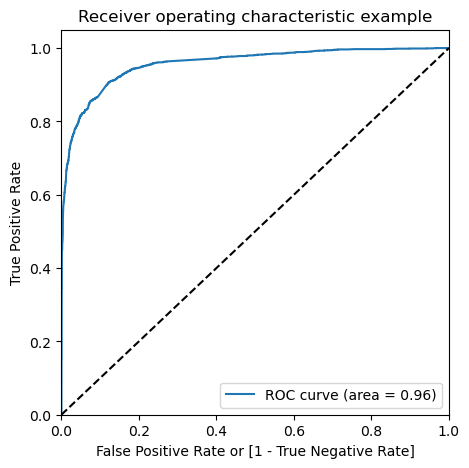

In [162]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

As the curve is closer to the left-hand border and then the top border of the ROC space, the model has good accuracy.

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [163]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Lead_Score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001414,1815,0.141378,0,1,0,0,0,0,0,0,0,0,0
1,1,0.970704,1141,97.070400,1,1,1,1,1,1,1,1,1,1,1
2,0,0.007889,259,0.788865,0,1,0,0,0,0,0,0,0,0,0
3,1,0.983145,1509,98.314505,1,1,1,1,1,1,1,1,1,1,1
4,1,0.993965,2019,99.396485,1,1,1,1,1,1,1,1,1,1,1


In [164]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377968  1.000000  0.000000
0.1   0.1  0.823362  0.961055  0.739695
0.2   0.2  0.866888  0.938023  0.823664
0.3   0.3  0.887623  0.907454  0.875573
0.4   0.4  0.898386  0.851340  0.926972
0.5   0.5  0.899019  0.817002  0.948855
0.6   0.6  0.895220  0.787688  0.960560
0.7   0.7  0.890630  0.757538  0.971501
0.8   0.8  0.873061  0.693467  0.982188
0.9   0.9  0.848845  0.614322  0.991349


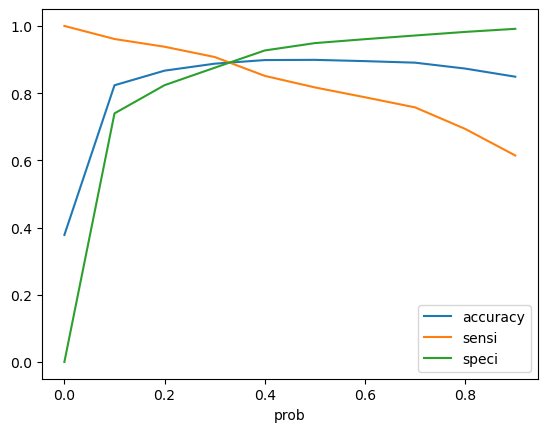

In [165]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [209]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,CustID,Lead_Score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.001414,1815,0.141378,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.970704,1141,97.070400,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.007889,259,0.788865,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.983145,1509,98.314505,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.993965,2019,99.396485,1,1,1,1,1,1,1,1,1,1,1,1


In [210]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8930041152263375

In [211]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3580,  350],
       [ 326, 2062]], dtype=int64)

In [212]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [213]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8634840871021775

In [214]:
# Let us calculate specificity
TN / float(TN+FP)

0.910941475826972

In [215]:
# Calculate false positive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.089058524173028


In [216]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8548922056384743


In [217]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9165386584741424


### Step 11: Making predictions on the test set

In [176]:
X_test[['TotalVisits','Total Time Spent on Website',
         'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                  'Total Time Spent on Website','Page Views Per Visit']])

In [177]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Asymmetrique Activity Index_03.Low,Last Notable Activity_SMS Sent
911,1.002034,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4465,-0.885715,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5301,-0.740644,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2548,-0.281562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1532,-0.885715,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0


In [178]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [179]:
y_test_pred = res.predict(X_test_sm)

In [180]:
y_test_pred[:10]

911     0.579542
4465    0.335656
5301    0.041901
2548    0.066092
1532    0.000806
6746    0.047570
3323    0.116525
447     0.966924
8457    0.047050
9199    0.169604
dtype: float64

In [181]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [182]:
# Let's see the head
y_pred_1.head()

,0
911,0.579542
4465,0.335656
5301,0.041901
2548,0.066092
1532,0.000806


In [183]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [184]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [185]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [186]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [187]:
y_pred_final.head()

,Converted_Yes,CustID,0
0,0,911,0.579542
1,0,4465,0.335656
2,0,5301,0.041901
3,0,2548,0.066092
4,0,1532,0.000806


In [188]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [189]:
#Adding Lead_Score column
y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'] * 100

In [190]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Converted_Yes','Converted_Prob', 'Lead_Score'], axis=1)

In [191]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted_Yes,Converted_Prob,Lead_Score
0,911,0,0.579542,57.954177
1,4465,0,0.335656,33.565565
2,5301,0,0.041901,4.190069
3,2548,0,0.066092,6.609154
4,1532,0,0.000806,0.080609


In [192]:
y_pred_final['final_predicted'] = y_pred_final.Lead_Score.map(lambda x: 1 if x > 80 else 0)

In [193]:
y_pred_final.head()

,CustID,Converted_Yes,Converted_Prob,Lead_Score,final_predicted
0,911,0,0.579542,57.954177,0
1,4465,0,0.335656,33.565565,0
2,5301,0,0.041901,4.190069,0
3,2548,0,0.066092,6.609154,0
4,1532,0,0.000806,0.080609,0


In [194]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted_Yes, y_pred_final.final_predicted)

0.878922111480251

In [196]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted_Yes, y_pred_final.final_predicted )
confusion3

array([[1653,   29],
       [ 299,  728]], dtype=int64)

In [197]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [198]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7088607594936709

In [199]:
# Let us calculate specificity
TN / float(TN+FP)

0.9827586206896551

Note that, the accuracy, sensitivity, and specificity for test set are very similar to the training set for the Lead score of above 80. Thus, our model is working well.